In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

2025-05-07 18:49:53.965937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746643794.257045      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746643794.338336      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Build the model
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-07 18:50:11.564036: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7664 - loss: 0.6520 - val_accuracy: 0.8575 - val_loss: 0.3944
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8787 - loss: 0.3344 - val_accuracy: 0.8890 - val_loss: 0.3090
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8999 - loss: 0.2755 - val_accuracy: 0.8963 - val_loss: 0.2897
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9131 - loss: 0.2337 - val_accuracy: 0.9098 - val_loss: 0.2539
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9208 - loss: 0.2128 - val_accuracy: 0.9064 - val_loss: 0.2501
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9321 - loss: 0.1791 - val_accuracy: 0.9068 - val_loss: 0.2668
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9380 - loss: 0.1667 - val_accuracy: 0.8957 - val_loss: 0.2912
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9482 -

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8986 - loss: 0.3082
Test accuracy: 0.9011


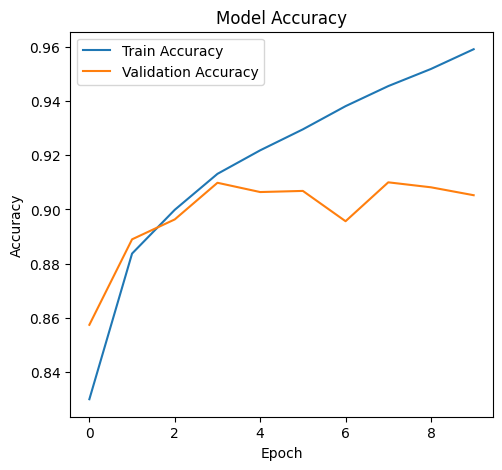

In [9]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

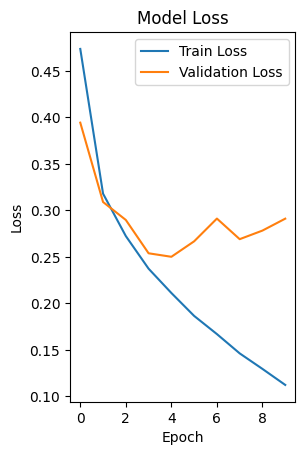

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [11]:
# Predict on test images
predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


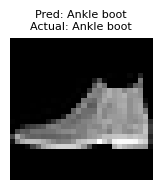

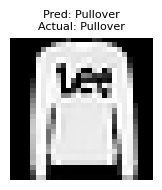

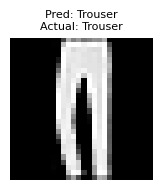

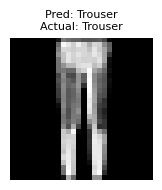

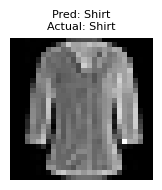

In [12]:
# Show predictions for first 5 test images
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i]]}", fontsize=8)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [17]:
# ### 🧠 Explanation of CNN Code for Image Classification (MNIST-like Data)

# This code builds, compiles, and evaluates a **Convolutional Neural Network (CNN)** to classify grayscale images (e.g., MNIST digits) into 10 categories. Here's a breakdown of each component:

# ---

# ### 🏗️ Model Architecture

# ```python
# model = keras.Sequential([
#     layers.Reshape((28, 28, 1), input_shape=(28, 28)),
# ```

# * **Reshape Layer**: Adds a channel dimension to 2D input (28×28) → (28×28×1).
# * Needed because `Conv2D` expects 4D input: `(batch_size, height, width, channels)`.

# ---

# ```python
#     layers.Conv2D(32, (3, 3), activation='relu'),
# ```

# * **Conv2D Layer**: Applies 32 convolution filters of size 3×3 to the input image.
# * **ReLU** activation adds non-linearity and allows the network to learn complex features.

# ---

# ```python
#     layers.MaxPooling2D(2, 2),
# ```

# * **MaxPooling Layer**: Reduces spatial dimensions by taking the max over 2×2 regions.
# * Downsamples the feature map, reducing computation and improving robustness to translation.

# ---

# ```python
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),
# ```

# * A second convolutional block with 64 filters followed by max-pooling.
# * Helps in capturing more abstract patterns like strokes and edges.

# ---

# ```python
#     layers.Flatten(),
# ```

# * **Flatten Layer**: Converts 3D output from conv layers into 1D vector for Dense layers.
# * Prepares data for fully connected layers (used for classification).

# ---

# ```python
#     layers.Dense(128, activation='relu'),
# ```

# * **Dense Layer**: Fully connected layer with 128 neurons and ReLU activation.
# * Learns high-level patterns for classification.

# ---

# ```python
#     layers.Dense(10, activation='softmax')
# ])
# ```

# * **Output Layer**: 10 neurons (one for each class), **softmax** activation converts outputs to class probabilities.

# ---

# ### ⚙️ Model Compilation

# ```python
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ```

# * **Optimizer (`adam`)**: Adaptive optimizer, combines momentum and RMSProp.
# * **Loss (`sparse_categorical_crossentropy`)**: Used for multi-class classification when labels are integer-encoded (0 to 9).
# * **Metric (`accuracy`)**: Tracks proportion of correct predictions during training and evaluation.

# ---

# ### 🧪 Model Evaluation

# ```python
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f"Test accuracy: {test_acc:.4f}")
# ```

# * Evaluates model on unseen test data.
# * Returns **loss** (model error) and **accuracy** (classification performance).

# ---

# ### 📈 Output Example

# ```
# 313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8986 - loss: 0.3082
# Test accuracy: 0.9011
# ```

# * **Accuracy \~90%**: The model correctly classifies \~90% of test samples.
# * **Loss 0.3082**: Lower loss indicates better prediction confidence and error minimization.

# ---

# Let me know if you want to visualize predictions or see intermediate feature maps.
